### Figure 3 : Explained variance

In [8]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.extend(['/home/nkinsky/Documents/GitHub/NeuroPy'])
sys.path.extend(['/home/nkinsky/Documents/GitHubPrivate/pythonprogs/DataPaths/'])
    
import matplotlib.pyplot as plt
import numpy as np
import subjects
import pandas as pd
import seaborn as sns
from neuropy.plotting import Fig
from neuropy.utils.misc import flatten
from scipy import stats
from plotters import Plotter, get_nsd_vs_sd_df, add_zt_str, stats_to_df, filter_stats_df
from stats_utils import get_bootstrap_prob, get_bootstrap_prob_paired
import ev_utils

grpdata = subjects.GroupData()
ev_df = grpdata.ev_bootstrap_session_pairs_mean
palette = subjects.colors_sd(1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 3A and EDF3: Individual Session plots of EV with hypnograms
See `sd_figure3.ipynb`.
n value (# pairs) calculated in sd_expvar_bootstrap.ipynb

### 3D: EV blocks

In [9]:
subjects.GroupData().ev_brain

,start,stop,label,sub,name,grp
0,0.053688,0.086744,QW,0,RatKDay2,NSD
1,0.086744,0.125356,AW,0,RatKDay2,NSD
2,0.125356,0.127856,QW,0,RatKDay2,NSD
3,0.127856,0.165357,AW,0,RatKDay2,NSD
4,0.165357,0.168968,QW,0,RatKDay2,NSD
...,...,...,...,...,...,...
5316,8.853585,8.859696,REM,12,RatRDay2,SD
5317,8.859696,8.868585,AW,12,RatRDay2,SD
5318,8.868585,8.887196,QW,12,RatRDay2,SD
5319,8.887196,8.928031,NREM,12,RatRDay2,SD


In [2]:
boot_df = subjects.GroupData().ev_bootstrap_session_pairs
boot_df.groupby(["grp", "zt"], sort=False).aggregate(
    ["mean", "median", lambda x: x.quantile(0.75) - x.quantile(0.25)]
).reset_index()

grp        zt        ev                     
                      mean    median <lambda_0>
0  NSD  ZT 0-2.5  0.153941  0.152406   0.073714
1  NSD  ZT 2.5-5  0.082181  0.083875   0.048365
2  NSD  ZT 5-7.5  0.049061  0.039114   0.044435
3   SD  ZT 0-2.5  0.052267  0.047427   0.029289
4   SD  ZT 2.5-5  0.015491  0.015046   0.007677
5   SD  ZT 5-7.5  0.049542  0.051559   0.016294

p-value annotation legend:
      ns: 1.00e-01 < p <= 1.00e+00
       #: 5.00e-02 < p <= 1.00e-01
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

ZT 2.5-5_NSD vs. ZT 2.5-5_SD: get_bootstrap_prob, P_val:9.747e-04 Stat=3.169e+00
ZT 0-2.5_NSD vs. ZT 0-2.5_SD: get_bootstrap_prob, P_val:2.289e-02 Stat=2.693e+00
ZT 5-7.5_NSD vs. ZT 5-7.5_SD: get_bootstrap_prob, P_val:3.921e-01 Stat=1.979e-02
ZT 0-2.5_NSD vs. ZT 5-7.5_SD: get_bootstrap_prob, P_val:7.847e-04 Stat=3.004e+00
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       #: 2.50e-02 < p <= 5.00e-02
       *: 5.00e-03 < p <= 2.50e-02
      **: 5.00e-04 < p <= 5.00e-03
     ***: p <= 5.00e-04

ZT 0-2.5_NSD vs. ZT 2.5-5_NSD: get_bootstrap_prob_paired, P_val:0.000e+00 Stat=7.176e-02
ZT 2.5-5_NSD vs. ZT 5-7.5_NSD: get_bootstrap_prob_paired, P_val:3.430e-02 Stat=3.312e-02
ZT 0-2.5_NSD vs. ZT 5-7.5_NSD: get_bootstrap_prob_paired, P_val:4.000e-04 Stat=1.049e-01
p-value annotation legend

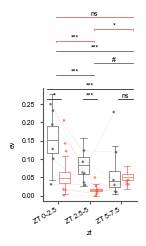

In [9]:
fig = subjects.SdFig().fig3()
ax = fig.subplot(fig.gs[:2, 4])
boot_df = add_zt_str(grpdata.ev_bootstrap_session_pairs)
ev_df = add_zt_str(grpdata.ev_in_chunks)

results_list = []
p1 = Plotter(data=boot_df, x="zt", y="ev", hue="grp", hue_order=["NSD", "SD"], ax=ax)
results_list.append(p1.boxplot_sd2(palette=palette, zorder=3).stat_anot_sd(
    stat_within=get_bootstrap_prob_paired,
    stat_across=get_bootstrap_prob,
    alpha_across=[0.05, 0.01, 0.001],
    alpha_within=[0.025, 0.005, 0.0005],
    fontsize=5,
    verbose=True,
))

palette_light = subjects.colors_sd_light(1)
p2 = Plotter(data=ev_df, x="zt", y="ev", hue="grp", hue_order=["NSD", "SD"])
p2.striplineplot_sd(palette=palette_light)

fig.savefig(subjects.figpath_sd / "ev_blocks", format="svg")

In [7]:
results_df = stats_to_df(results_list)
results_df

,comp1,comp2,test,pval,test_stat
0,ZT 2.5-5_NSD,ZT 2.5-5_SD,"get_bootstrap_prob,",9.747e-04,3.169e+00
1,ZT 0-2.5_NSD,ZT 0-2.5_SD,"get_bootstrap_prob,",2.289e-02,2.693e+00
2,ZT 5-7.5_NSD,ZT 5-7.5_SD,"get_bootstrap_prob,",3.921e-01,1.979e-02
3,ZT 0-2.5_NSD,ZT 5-7.5_SD,"get_bootstrap_prob,",7.847e-04,3.004e+00
4,ZT 0-2.5_NSD,ZT 2.5-5_NSD,"get_bootstrap_prob_paired,",0.000e+00,7.176e-02
5,ZT 2.5-5_NSD,ZT 5-7.5_NSD,"get_bootstrap_prob_paired,",3.430e-02,3.312e-02
6,ZT 0-2.5_NSD,ZT 5-7.5_NSD,"get_bootstrap_prob_paired,",4.000e-04,1.049e-01
7,ZT 0-2.5_SD,ZT 2.5-5_SD,"get_bootstrap_prob_paired,",5.000e-04,3.678e-02
8,ZT 2.5-5_SD,ZT 5-7.5_SD,"get_bootstrap_prob_paired,",6.200e-03,-3.405e-02
9,ZT 0-2.5_SD,ZT 5-7.5_SD,"get_bootstrap_prob_paired,",4.249e-01,2.725e-03


In [18]:
# Display stats for spreadsheet
pd.DataFrame(flatten(flatten(results_list)), columns=["comp1", "comp2", "test", "pval", "test_stat"])

,comp1,comp2,test,pval,test_stat
0,ZT 2.5-5_NSD,ZT 2.5-5_SD,"get_bootstrap_prob,",9.747e-04,3.169e+00
1,ZT 0-2.5_NSD,ZT 0-2.5_SD,"get_bootstrap_prob,",2.289e-02,2.693e+00
2,ZT 5-7.5_NSD,ZT 5-7.5_SD,"get_bootstrap_prob,",3.921e-01,1.979e-02
3,ZT 0-2.5_NSD,ZT 5-7.5_SD,"get_bootstrap_prob,",7.847e-04,3.004e+00
4,ZT 0-2.5_NSD,ZT 2.5-5_NSD,"get_bootstrap_prob_paired,",0.000e+00,7.176e-02
5,ZT 2.5-5_NSD,ZT 5-7.5_NSD,"get_bootstrap_prob_paired,",3.430e-02,3.312e-02
6,ZT 0-2.5_NSD,ZT 5-7.5_NSD,"get_bootstrap_prob_paired,",4.000e-04,1.049e-01
7,ZT 0-2.5_SD,ZT 2.5-5_SD,"get_bootstrap_prob_paired,",5.000e-04,3.678e-02
8,ZT 2.5-5_SD,ZT 5-7.5_SD,"get_bootstrap_prob_paired,",6.200e-03,-3.405e-02
9,ZT 0-2.5_SD,ZT 5-7.5_SD,"get_bootstrap_prob_paired,",4.249e-01,2.725e-03


### EV in 1h blocks

p-value annotation legend:
      ns: 1.00e-01 < p <= 1.00e+00
       #: 5.00e-02 < p <= 1.00e-01
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

4-5_NSD vs. 4-5_SD: get_bootstrap_prob, P_val:7.801e-04 Stat=2.851e+00
0-1_NSD vs. 0-1_SD: get_bootstrap_prob, P_val:1.557e-01 Stat=1.345e+00
5-6_NSD vs. 5-6_SD: get_bootstrap_prob, P_val:4.394e-01 Stat=1.948e-01
0-1_NSD vs. 5-6_SD: get_bootstrap_prob, P_val:2.739e-02 Stat=1.987e+00
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       #: 2.50e-02 < p <= 5.00e-02
       *: 5.00e-03 < p <= 2.50e-02
      **: 5.00e-04 < p <= 5.00e-03
     ***: p <= 5.00e-04

0-1_NSD vs. 4-5_NSD: get_bootstrap_prob_paired, P_val:1.160e-02 Stat=4.696e-02
4-5_NSD vs. 5-6_NSD: get_bootstrap_prob_paired, P_val:2.119e-01 Stat=1.966e-02
0-1_NSD vs. 5-6_NSD: get_bootstrap_prob_paired, P_val:1.500e-03 Stat=6.662e-02
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       #: 2.50e-02 < p <= 5.00e-0

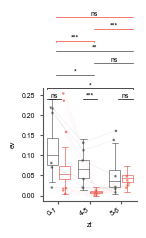

In [12]:
fig = subjects.SdFig().fig3()
ax = fig.subplot(fig.gs[:2, 4])
boot_df = add_zt_str(grpdata.ev_1h_blocks_bootstrap)
ev_df = add_zt_str(grpdata.ev_in_chunks1h)

p1 = Plotter(data=boot_df, x="zt", y="ev", hue="grp", hue_order=["NSD", "SD"], ax=ax)
p1.boxplot_sd2(palette=palette, zorder=3).stat_anot_sd(
    stat_within=get_bootstrap_prob_paired,
    stat_across=get_bootstrap_prob,
    alpha_across=[0.05, 0.01, 0.001],
    alpha_within=[0.025, 0.005, 0.0005],
    fontsize=5,
    verbose=True,
)

palette_light = subjects.colors_sd_light(1)
p2 = Plotter(data=ev_df, x="zt", y="ev", hue="grp", hue_order=["NSD", "SD"])
p2.striplineplot_sd(palette=palette_light)

fig.savefig(subjects.figpath_sd / "ev_1h_blocks", format="svg")

### EDF 5A-B: EV vs time on maze / running distance on maze

In [ ]:
# Sanity check code to see if I can infer laps from up/down maze running designations
# Answer = no, would need to merge_neighbors AND then ensure that the start and ends of each run were in the start/end zones of the track.
# Very messy, try just using total distance run on track first
sess = subjects.ripple_sess()[-1]
_, ax =  plt.subplots(1, 1, figsize=(12,2), sharex=True)
ax.plot(sess.maze.time, sess.maze.x)
for lap in sess.maze_run.merge_neighbors(5).itertuples():
    color = [1, 0, 0, 0.2] if lap.label == "up" else [0, 1, 0, 0.2]
    ax.axvspan(lap.start, lap.stop, color=color)

In [ ]:
# Assemble maze time/duration dataframe
sessions = subjects.ripple_sess()

maze_time, maze_dist, sess_name, sess_num, grp_list = [], [], [], [], []
for sess in sessions:
    if sess.name in ev_df.name.unique():
        sess_name.append(sess.name)
        maze_dist.append(np.abs(np.diff(sess.maze.x)).sum()/100)
        maze_time.append(sess.maze.duration)
        sess_num.append(ev_df[ev_df.name == sess.name].session.unique()[0])
        grp_list.append(ev_df[ev_df.name == sess.name].grp.unique()[0])
maze_df = pd.DataFrame({"maze_time": maze_time, "maze_dist": maze_dist, "name": sess_name,
                        "session": sess_num, "grp": grp_list})
maze_df.head(4)

In [ ]:
# Now plot it
for fname, feature in zip(["Distance run (m)", "Time on Maze (sec)"], ["maze_dist", "maze_time"]):
    # fig, ax = plt.subplots(2, 3, figsize=(12, 6))
    # fig = subjects.SdFig().fig3()
    fig = subjects.SdFig().fig_supp()
    # ax = fig.subplot(fig.gs[:2, 4])
    # fig.fig.suptitle(feature)
    for idg, grp in enumerate(["NSD", "SD"]):
        color_use = subjects.colors_sd(1)[idg]
        for idz, zt in enumerate(["ZT 0-2.5", "ZT 2.5-5", "ZT 5-7.5"]):
            ax = fig.subplot(fig.gs[(idg*2 + idg):((idg+1)*2+ idg), idz])
            df_maze_use = maze_df[maze_df.grp == grp]
            df_ev_use = ev_df[(ev_df.grp == grp) & (ev_df.zt == zt)]
            df_use = df_maze_use.merge(df_ev_use, on="name", suffixes=(None, "_y"))
            sns.scatterplot(data=df_use, x=feature, y="ev", ax=ax, color=color_use)

            lr = stats.linregress(df_use[feature], df_use.ev)
            xlims = np.array(ax.get_xlim())
            ax.plot(xlims, xlims*lr.slope + lr.intercept, color=color_use)
            ax.set_title(f"{grp} {zt}\nr={lr.rvalue:.3g}, p={lr.pvalue:.3g}")
            ax.set_xlabel(f"{fname}")
            ax.set_ylabel("EV")
    fig.savefig(subjects.figpath_sd / f"ev_vs_{feature}", format="svg")
            

### EV within NREM and WAKE
Similar to 3B but w/o rigorous alignment to sleep onset

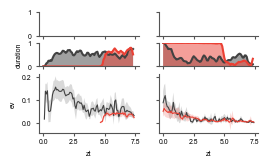

In [3]:
nrem_duration_df = grpdata.nrem_duration_NREM
wake_duration_df = grpdata.wake_duration_aligned_by_WAKE
nrem_df = grpdata.ev_NREM_bootstrap
nrem_df["zt"] = nrem_df["zt"].astype("float") * (5 / 60)
wake_df = grpdata.ev_aligned_by_WAKE
wake_df["zt"] = wake_df["zt"].astype("float") * (5 / 60)

fig = subjects.SdFig().fig3()
subfig = fig.add_subfigure(fig.gs[:2, :2])
axs = subfig.subplots(3, 2, sharex=True, sharey="row", height_ratios=[1, 1, 2.5])


for i, df in enumerate([nrem_duration_df, wake_duration_df]):
    mean_duration = df.groupby(["grp", "zt"]).mean(numeric_only=True).reset_index()
    mean_duration["zt"] = mean_duration["zt"].astype("float") * (5 / 60)
    mean_duration["duration"] = mean_duration["duration"] / (900)

    ax = axs[1, i]
    plotter = Plotter(data=mean_duration, x="zt", y="duration", hue="grp", ax=ax)
    plotter.areaplot(palette=subjects.colors_sd())
    ax.set_ylim(0, 1)

for line in ax.lines:
    line.get_xydata()

for i, df in enumerate([nrem_df, wake_df]):
    ax = axs[2, i]
    sns.lineplot(
        data=df,
        x="zt",
        y="ev",
        hue="grp",
        palette=subjects.colors_sd(),
        ci="sd",
        ax=ax,
        lw=0.8,
        err_kws=dict(edgecolor=None),
    )
    ax.legend("", frameon=False)


fig.savefig(subjects.figpath_sd / "ev_within_nrem_wake")

### 3B: EV aligned by NREM onset and WAKE

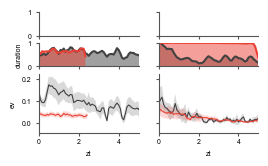

In [4]:
nrem_duration_df = grpdata.nrem_duration_aligned_by_nrem_onset
wake_duration_df = grpdata.wake_duration_aligned_by_WAKE
nrem_df = grpdata.ev_aligned_by_NREM_onset
nrem_df["zt"] = nrem_df["zt"].astype("float") * (5 / 60)
wake_df = grpdata.ev_aligned_by_WAKE
wake_df["zt"] = wake_df["zt"].astype("float") * (5 / 60)

fig = subjects.SdFig().fig3()
subfig = fig.add_subfigure(fig.gs[:2, :2])
axs = subfig.subplots(3, 2, sharex=True, sharey="row", height_ratios=[1, 1, 2.5])


for i, df in enumerate([nrem_duration_df, wake_duration_df]):
    mean_duration = df.groupby(["grp", "zt"]).mean(numeric_only=True).reset_index()
    mean_duration["zt"] = mean_duration["zt"].astype("float") * (5 / 60)
    mean_duration["duration"] = mean_duration["duration"] / (900)

    ax = axs[1, i]
    plotter = Plotter(data=mean_duration, x="zt", y="duration", hue="grp", ax=ax)
    plotter.areaplot(palette=subjects.colors_sd())
    ax.set_ylim(0, 1)

for line in ax.lines:
    line.get_xydata()

for i, df in enumerate([nrem_df, wake_df]):
    ax = axs[2, i]
    sns.lineplot(
        data=df,
        x="zt",
        y="ev",
        hue="grp",
        palette=subjects.colors_sd(),
        ci="sd",
        ax=ax,
        lw=0.8,
        err_kws=dict(edgecolor=None),
    )
    ax.legend("", frameon=False)
    if i == 0:
        ax.set_xlim(0, 2.5)
    if i == 1:
        ax.set_xlim(0, 5)
    # ax.set_ylim(0, 0.15)


fig.savefig(subjects.figpath_sd / "ev_statewise_nrem_wake")

In [ ]:
# tc_df1 = subjects.GroupData().ev_tc_aligned_by_NREM_onset
df1 = subjects.GroupData().ev_slopes_high_NREM_bootstrap
df1 = df1[df1.grp == "NSD"]
df1["grp"] = "NREM"
df2 = subjects.GroupData().ev_slopes_WAKE_bootstrap

df = pd.concat([df1, df2], ignore_index=True)

fig = subjects.SdFig().fig3(ncols=10)

ax = fig.subplot(fig.gs[:2, 2])

plotter = Plotter(data=df, x="grp", y="slope")
plotter.boxplot_sd2()
ax.set_xlabel("")
ax.set_ylabel("Exponential decay constant (h)")
fig.savefig(subjects.figpath_sd / "ev_slopes", format="svg")

Text(0, 0.5, 'Exponential decay constant (h)')

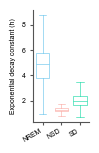

In [2]:
# tc_df1 = subjects.GroupData().ev_tc_aligned_by_NREM_onset
tc_df1 = subjects.GroupData().ev_tc_NREM
tc_df1["grp"] = "NREM"
tc_df2 = subjects.GroupData().ev_tc_WAKE

tc_df = pd.concat([tc_df1, tc_df2], ignore_index=True)
tc_df["tc"] = tc_df["tc"] * (5 / 60) * np.log(2)

fig = subjects.SdFig().fig3(ncols=10)

ax = fig.subplot(fig.gs[:2, 2])

plotter = Plotter(data=tc_df, x="grp", y="tc")
plotter.boxplot_sd2()
ax.set_xlabel("")
ax.set_ylabel("Exponential decay constant (h)")

# Plot individual sessions overlaid
# wake_df = subjects.GroupData().pairwise_correlations_WAKE
# wake_tc = wake_df.groupby(["grp", "session"]).apply(ev_utils.get_exp_time_constant).reset_index()
# wake_tc = wake_tc.drop(columns=["level_2"])
# wake_tc["tc"] = wake_tc["tc"] * 5/60 * np.log(2)
# wake_tc = wake_tc.drop(index=12)  #
# nrem_df = subjects.GroupData().pairwise_correlations_NREM
# nrem_df = nrem_df[nrem_df.grp == "NSD"]
# nrem_tc = nrem_df.groupby(["grp", "session"]).apply(ev_utils.get_exp_time_constant).reset_index().drop(columns=["level_2"])
# nrem_tc["tc"] = nrem_tc["tc"] * 5/60 * np.log(2)
# nrem_tc["grp"] = "NREM"

# sess_mean_tc = pd.concat((wake_tc, nrem_tc)).reset_index()
# p2 = Plotter(data=sess_mean_tc, x="grp", y="tc")
# p2.striplineplot_sd()

# fig.savefig(subjects.figpath_sd / "half_life_nrem_wake", format="svg")

/home/nkinsky/miniforge3/envs/NeuroPy/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


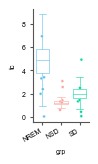

In [3]:
# Plot using all WAKE and NREM periods. NOT aligned to start of NREM.
tc_df1 = subjects.GroupData().ev_tc_NREM
tc_df1["grp"] = "NREM"
tc_df2 = subjects.GroupData().ev_tc_WAKE

tc_df = pd.concat([tc_df1, tc_df2], ignore_index=True)
tc_df["tc"] = tc_df["tc"] * (5 / 60) * np.log(2)

fig = subjects.SdFig().fig3(ncols=10)

ax = fig.subplot(fig.gs[:2, 2])

plotter = Plotter(data=tc_df, x="grp", y="tc")
plotter.boxplot_sd2()
ax.set_xlabel("")
ax.set_ylabel("Exponential decay constant (h)")

# Plot individual sessions overlaid
wake_df = subjects.GroupData().pairwise_correlations_WAKE
wake_tc = wake_df.groupby(["grp", "session"]).apply(ev_utils.get_exp_time_constant).reset_index()
wake_tc = wake_tc.drop(columns=["level_2"])
wake_tc["tc"] = wake_tc["tc"] * 5/60 * np.log(2)
wake_tc = wake_tc.drop(index=12)  #
nrem_df = subjects.GroupData().pairwise_correlations_NREM
nrem_df = nrem_df[nrem_df.grp == "NSD"]
nrem_tc = nrem_df.groupby(["grp", "session"]).apply(ev_utils.get_exp_time_constant).reset_index().drop(columns=["level_2"])
nrem_tc["tc"] = nrem_tc["tc"] * 5/60 * np.log(2)
nrem_tc["grp"] = "NREM"

sess_mean_tc = pd.concat((wake_tc, nrem_tc)).reset_index()
sess_mean_tc = sess_mean_tc.sort_values(by=["grp"], key=(lambda x: [np.where(xx == np.array(["NREM", "NSD", "SD"]))[0][0] for xx in x]))
sess_mean_tc["session"] = np.arange(sess_mean_tc.shape[0])
p2 = Plotter(data=sess_mean_tc, x="grp", y="tc")
p2.striplineplot_sd()

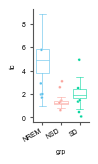

In [4]:
# Plot using with "NREM" EV calculated starting at the first NREM rich period.
tc_df1 = subjects.GroupData().ev_tc_NREM
tc_df1["grp"] = "NREM"
tc_df2 = subjects.GroupData().ev_tc_WAKE

tc_df = pd.concat([tc_df1, tc_df2], ignore_index=True)
tc_df["tc"] = tc_df["tc"] * (5 / 60) * np.log(2)

fig = subjects.SdFig().fig3(ncols=10)

ax = fig.subplot(fig.gs[:2, 2])

plotter = Plotter(data=tc_df, x="grp", y="tc")
plotter.boxplot_sd2()
ax.set_xlabel("")
ax.set_ylabel("Exponential decay constant (h)")

# Plot individual sessions overlaid
wake_df = subjects.GroupData().pairwise_correlations_aligned_by_WAKE
wake_tc = wake_df.groupby(["grp", "session"]).apply(ev_utils.get_exp_time_constant).reset_index()
wake_tc = wake_tc.drop(columns=["level_2"])
wake_tc["tc"] = wake_tc["tc"] * 5/60 * np.log(2)
wake_tc = wake_tc.drop(index=12)  # NRK question - why are these so high?
nrem_df = subjects.GroupData().pairwise_correlations_aligned_by_NREM_onset
nrem_df = nrem_df[nrem_df.grp == "NSD"]
nrem_tc = nrem_df.groupby(["grp", "session"]).apply(ev_utils.get_exp_time_constant).reset_index().drop(columns=["level_2"])
nrem_tc = nrem_tc.drop(index=0)  # NRK question - why are these so low
nrem_tc["tc"] = nrem_tc["tc"] * 5/60 * np.log(2)
nrem_tc["grp"] = "NREM"

sess_mean_tc = pd.concat((wake_tc, nrem_tc)).reset_index()
sess_mean_tc = sess_mean_tc.sort_values(by=["grp"], key=(lambda x: [np.where(xx == np.array(["NREM", "NSD", "SD"]))[0][0] for xx in x]))
sess_mean_tc["session"] = np.arange(sess_mean_tc.shape[0])
p2 = Plotter(data=sess_mean_tc, x="grp", y="tc")
p2.striplineplot_sd()

### 3C: Explained variance decay curves
Has the most up-to-date alignment data.

In [4]:
boot_df = subjects.GroupData().ev_bootstrap_session_pairs
boot_df.groupby(["grp", "zt"], sort=False).aggregate(
    ["mean", "median", lambda x: x.quantile(0.75) - x.quantile(0.25)]
).reset_index()

grp        zt        ev                     
                      mean    median <lambda_0>
0  NSD  ZT 0-2.5  0.153941  0.152406   0.073714
1  NSD  ZT 2.5-5  0.082181  0.083875   0.048365
2  NSD  ZT 5-7.5  0.049061  0.039114   0.044435
3   SD  ZT 0-2.5  0.052267  0.047427   0.029289
4   SD  ZT 2.5-5  0.015491  0.015046   0.007677
5   SD  ZT 5-7.5  0.049542  0.051559   0.016294

In [5]:
subjects.GroupData().ev_tc_aligned_by_NREM_onset_NRK.groupby("grp").aggregate(
    ["mean", "median", lambda x: x.quantile(0.75) - x.quantile(0.25)]
).reset_index()

grp         tc                      
             mean     median <lambda_0>
0  NSD  61.097065  63.378169  36.143888

In [23]:
subjects.GroupData().ev_tc_aligned_by_WAKE_NRK.groupby("grp").aggregate(
    ["mean", "median", lambda x: x.quantile(0.75) - x.quantile(0.25)]
).reset_index()

grp             tc                      
                 mean     median <lambda_0>
0  NSD      22.113953  21.584939   4.092649
1   SD  189484.318660  33.848224  12.487362

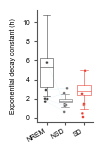

In [6]:
half_life = False  # True = plot half life on y axis, False = plot decay constant. Same results either way, just scales y-axis differently
tc_df1 = subjects.GroupData().ev_tc_aligned_by_NREM_onset_NRK
tc_df1["grp"] = "NREM"
tc_df2 = subjects.GroupData().ev_tc_aligned_by_WAKE_NRK

tc_df = pd.concat([tc_df1, tc_df2], ignore_index=True)

if half_life:
    tc_df["tc"] = tc_df["tc"] * (5 / 60) * np.log(2)
    save_name = "half_life"
else:
    tc_df["tc"] = tc_df["tc"] * (5 / 60)
    save_name = "decay_constant"

fig = subjects.SdFig().fig3(ncols=10)

ax = fig.subplot(fig.gs[:2, 2])

# palette = subjects.colors_sd(1)
# palette_light = subjects.colors_sd_light(1)

palette_use = subjects.colors_sd()
palette_use.insert(1, subjects.colors_sd_light(1)[0])
palette_use

plotter = Plotter(data=tc_df, x="grp", y="tc")
plotter.boxplot_sd2(palette=palette_use)


# Plot individual sessions overlaid
wake_df = subjects.GroupData().pairwise_correlations_aligned_by_WAKE
wake_tc = wake_df.groupby(["grp", "session"]).apply(ev_utils.get_exp_time_constant).reset_index()
wake_tc = wake_tc.drop(columns=["level_2"])
wake_tc["tc"] = wake_tc["tc"] * 5/60 * np.log(2)
wake_tc = wake_tc.drop(index=12)  # NRK question - why are these so high?
nrem_df = subjects.GroupData().pairwise_correlations_aligned_by_NREM_onset
nrem_df = nrem_df[nrem_df.grp == "NSD"]
nrem_tc = nrem_df.groupby(["grp", "session"]).apply(ev_utils.get_exp_time_constant).reset_index().drop(columns=["level_2"])
nrem_tc = nrem_tc.drop(index=0)  # NRK question - why are these so high?
nrem_tc["tc"] = nrem_tc["tc"] * 5/60 * np.log(2)
nrem_tc["grp"] = "NREM"

sess_mean_tc = pd.concat((wake_tc, nrem_tc)).reset_index()
sess_mean_tc = sess_mean_tc.sort_values(by=["grp"], key=(lambda x: [np.where(xx == np.array(["NREM", "NSD", "SD"]))[0][0] for xx in x]))
# sess_mean_tc["session"] = np.arange(sess_mean_tc.shape[0])
sess_mean_tc.rename(columns={"index": "session"})
p2 = Plotter(data=sess_mean_tc, x="grp", y="tc")
p2.striplineplot_sd(palette=palette_use)
ax.set_xlabel("")
ax.set_ylabel("Exponential decay constant (h)")

fig.savefig(subjects.figpath_sd / f"{save_name}_nrem_wake_NRK", format="svg")

In [13]:
# Run stats on bootstrapped distributions
from itertools import permutations, combinations
from stats_utils import get_bootstrap_prob

stat_all = []
for grps in combinations(tc_df.grp.unique(), 2):
    grp1 = tc_df[tc_df.grp == grps[0]].tc
    grp2 = tc_df[tc_df.grp == grps[1]].tc
    stats_result = stats.ttest_ind(grp1, grp2, equal_var=False)
    boot_prob = get_bootstrap_prob(grp1.values, grp2.values)[1]
    stat_all.append(stats_result.pvalue)
    print(f"{grps[0]} vs. {grps[1]} Welch t-test pvalue={stats_result.pvalue:0.3g}, bootstrap p={boot_prob:.3g}")


NREM vs. NSD Welch t-test pvalue=0, bootstrap p=0.00164
NREM vs. SD Welch t-test pvalue=0, bootstrap p=0.052
NSD vs. SD Welch t-test pvalue=2.1e-318, bootstrap p=0.042


WAKE session # 12 dropped due to super high slope / flat curve
NREM session # 0 dropped due to super high slope / flat curve


NameError: name 'ev_pooled_df' is not defined

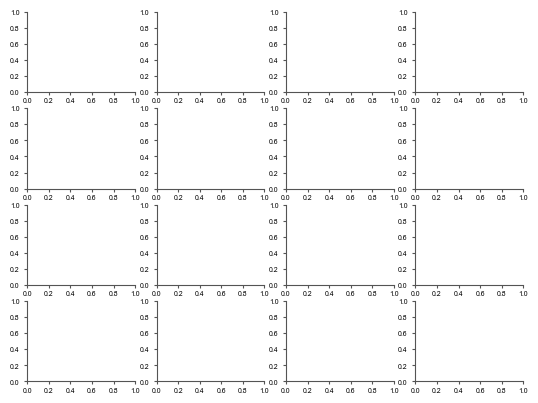

In [7]:
# 6 NSD and 7 SD sessions.
wake_df = subjects.GroupData().pairwise_correlations_aligned_by_WAKE
wake_tc = wake_df.groupby(["grp", "session"]).apply(ev_utils.get_exp_time_constant).reset_index()
wake_sesh_drop = wake_tc.iloc[12, :].session
print(f"WAKE session # {wake_sesh_drop} dropped due to super high slope / flat curve")
nrem_df = subjects.GroupData().pairwise_correlations_aligned_by_NREM_onset
nrem_df = nrem_df[nrem_df.grp == "NSD"]
nrem_tc = nrem_df.groupby(["grp", "session"]).apply(ev_utils.get_exp_time_constant).reset_index().drop(columns=["level_2"])
nrem_sesh_drop = nrem_tc.iloc[0, :].session
print(f"NREM session # {nrem_sesh_drop} dropped due to super high slope / flat curve")


# fig, ax = plt.subplots(4, 4)
# for ida, a in enumerate(ax.reshape(-1)):
#     df_use = ev_pooled_df[ev_pooled_df["sub"] == ida]
#     grp_use = df_use.grp.unique()[0]
#     if ida not in [0, 12]:
#         a.plot(df_use.zt.values, df_use.ev.values)
#     else:
#         a.plot(df_use.zt.values, df_use.ev.values, color='r')
#     a.set_title(f"{grp_use} sesh #{ida}")
    

### Saving

In [ ]:
fig.savefig(filename)